# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [20]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.
import copy

## Logistic Regression Model 


In [21]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta1 = 2 * np.random.randn(input_dim, hidden_dim) - 1       
        self.bias1 = np.zeros((1, hidden_dim))
        self.tempt1 = copy.deepcopy(self.theta1)
        self.tempb1 = copy.deepcopy(self.bias1)
        # dunno what these should be
        self.theta2 = 2 * np.random.randn(hidden_dim, output_dim) - 1      
        self.bias2 = np.zeros((1, output_dim))
        self.tempt2 = copy.deepcopy(self.theta2)
        self.tempb2 = copy.deepcopy(self.bias2)
    #--------------------------------------------------------------------------
    def compute_cost_with_regularization(self, X, y, lambd):
        m = X.shape[0]
        z2 = np.dot(X,self.tempt1) + self.tempb1
        a2 = np.tanh(z2) # use tanh function
        z3 = np.dot(a2, self.tempt2) + self.tempb2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        one_hot_y = np.zeros((m,np.max(y)+1))
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
        
        logprobs = np.multiply(one_hot_y, np.log(a3)) + np.multiply((1-one_hot_y), np.log(1-a3))
        cross_entropy_cost = (-1.0/m) * np.sum(logprobs)
        L2_regularization_cost = (np.sum(np.square(self.tempt1)) + np.sum(np.square(self.tempt2)))*(lambd/(2*m))
        cost = cross_entropy_cost + L2_regularization_cost
        cost = np.squeeze(cost)
        return cost
        
    def compute_cost(self,X, y):
        num_examples = np.shape(X)[0]
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2) # use tanh function
        z3 = np.dot(a2, self.theta2) + self.bias2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        
        m = X.shape[0]
        
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
#         logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
#             logloss[i] = -np.sum(np.log(a3[i,:]) * one_hot_y[i,:])
       
#         data_loss = np.sum(logloss)
        
        logprobs = np.multiply(one_hot_y, np.log(a3)) + np.multiply((1-one_hot_y), np.log(1-a3))
        cross_entropy_cost = (-1.0/m) * np.sum(logprobs)
        
        return cross_entropy_cost

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z2 = np.dot(X,self.theta1) + self.bias1
        a2 = np.tanh(z2)
        z3 = np.dot(a2, self.theta2) + self.bias2
        a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
        predictions = np.argmax(a3, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    def fitted(self,X,y,num_epochs,alpha,lambd):
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.tempt1) + self.tempb1
            a2 = np.tanh(z2)
            z3 = np.dot(a2, self.tempt2) + self.tempb2
            a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
            
            # Backpropagation
            beta3 = np.zeros_like(a3)
            beta2 = np.zeros_like(a2)
            one_hot_y = np.zeros_like(a3)
#             print(one_hot_y.shape)
#             print(X.shape)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
#                 print(one_hot_y)
            
            beta3 = a3 - one_hot_y
            
            # Get number of samples
            m = X.shape[0]
            
            # Compute gradients of model parameters
            dtheta2 = 1/m*(a2.T).dot(beta3) + (lambd/m)*self.tempt2
            dbias2 = 1/m*np.sum(beta3, axis=0)
            
            beta2 = np.multiply(beta3.dot(self.tempt2.T),(1-np.power(a2,2)))
            
            dtheta1 = 1/m*np.dot(X.T,beta2) + (lambd/m)*self.tempt1
            dbias1 = 1/m*np.sum(beta2, axis=0)            

            # Gradient descent parameter update
            self.tempt1 -= alpha * dtheta1
            self.tempb1 -= alpha * dbias1
            
            self.tempt2 -= alpha * dtheta2
            self.tempb2 -= alpha * dbias2
            if epoch%100 == 0:
                print("Cost", epoch/100, ":", self.compute_cost_with_regularization(X,y,lambd))
        return 0
    
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01):
    
        #Learns model parameters to fit the data.

        for epoch in range(0, num_epochs):

            # Forward propagation
            z2 = np.dot(X,self.theta1) + self.bias1
            a2 = np.tanh(z2)
            z3 = np.dot(a2, self.theta2) + self.bias2
            a3 = np.exp(z3) / np.sum(np.exp(z3), axis=1, keepdims=True)
            
            # Backpropagation
            beta3 = np.zeros_like(a3)
            beta2 = np.zeros_like(a2)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            
            beta3 = a3 - one_hot_y
            
            # Get number of samples
            m = X.shape[0]
            
            # Compute gradients of model parameters
            dtheta2 = 1/m*(a2.T).dot(beta3)
            dbias2 = 1/m*np.sum(beta3, axis=0)
            
            beta2 = np.multiply(beta3.dot(self.theta2.T),(1-np.power(a2,2)))
            
            dtheta1 = 1/m*np.dot(X.T,beta2)
            dbias1 = 1/m*np.sum(beta2, axis=0)            

            # Gradient descent parameter update
            self.theta1 -= alpha * dtheta1
            self.bias1 -= alpha * dbias1
            
            self.theta2 -= alpha * dtheta2
            self.bias2 -= alpha * dbias2
            if epoch%100 == 0:
                print("Cost", epoch/100, ":", self.compute_cost(X,y))
        return 0

In [22]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Data Analysis Basics

In [23]:
#1. Load data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',')#https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
# print(X)
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)

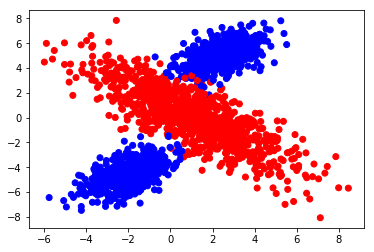

In [24]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [25]:
def split(X):
    
    xtrain=[]
    xtest = np.split(X,5)
    for i in range(0,5):
        xtrain.append(np.asarray([x for x in X if x not in xtest[i]]))
    xtrain = np.asarray(xtrain)
    
    return xtest, xtrain

In [26]:
Xtest,Xtrain = split(X)
ytest = np.split(y,5)
ytrain = []
ytrain.append(y[400:2000])
ytrain.append(np.concatenate((y[:400],y[800:2000])))
ytrain.append(np.concatenate((y[:800],y[1200:2000])))
ytrain.append(np.concatenate((y[:1200],y[1600:2000])))
ytrain.append(y[:1600])
ytrain = np.asarray(ytrain)


In [27]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
# print(input_dim)
hidden_dim = 10
logreg = LogisticRegression(input_dim, hidden_dim, output_dim)
# logreg1 = LogisticRegression(input_dim, hidden_dim, output_dim)

In [28]:
#4. Plot decision boundary
# plot_decision_boundary(logreg, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [10]:
#5. Train the model
# logreg.fit(X,y,1000,alpha=0.01)

In [11]:
# logreg1.fitted(X,y,1000,0.01,0.7)

In [12]:
#6. Plot decision boundary after training
# plot_decision_boundary(logreg, X, y)

In [13]:
# plot_decision_boundary(logreg, X, y)

In [14]:
# logreg.compute_cost(X,y)

## Model Evaluation

In [15]:
# #7. Compute accuracy and confusion matrix 
# acc = 0
# y_pred = logreg.predict(X)
# con_mat = np.zeros((output_dim, output_dim))
# for i in range(len(y_pred)):
#     con_mat[y_pred[i], y[i]] += 1
#     if y[i] == y_pred[i]:
#         acc += 1
# acc = acc/len(y_pred)
# print ('ACCURACY: ', acc)
# print ('CONFUSION MATRIX: \n', con_mat)

In [16]:
# #7. Compute accuracy and confusion matrix 
# acc = 0
# y_pred = logreg.predict(X)
# con_mat = np.zeros((output_dim, output_dim))
# for i in range(len(y_pred)):
#     con_mat[y_pred[i], y[i]] += 1
#     if y[i] == y_pred[i]:
#         acc += 1
# acc = acc/len(y_pred)
# print ('ACCURACY: ', acc)
# print ('CONFUSION MATRIX: \n', con_mat)

In [17]:
# logreg.fitted(Xtrain[0],ytrain[0],1000,0.01,0.7)
# acc = 0
# y_pred = logreg.predict(Xtest[0])
# con_mat = np.zeros((output_dim, output_dim))
# for i in range(len(y_pred)):
#     con_mat[y_pred[i], ytest[0][i]] += 1
#     if ytest[0][i] == y_pred[i]:
#         acc += 1
# acc = acc/len(y_pred)
# print ('ACCURACY: ', acc)
# print ('CONFUSION MATRIX: \n', con_mat)

Cost 0.0 : 7.77778150386
Cost 1.0 : 2.38366612243
Cost 2.0 : 1.24159009973
Cost 3.0 : 1.04333263806
Cost 4.0 : 0.949816139603
Cost 5.0 : 0.879546162495
Cost 6.0 : 0.815287121187
Cost 7.0 : 0.75137137423
Cost 8.0 : 0.68514528421
Cost 9.0 : 0.617661785734


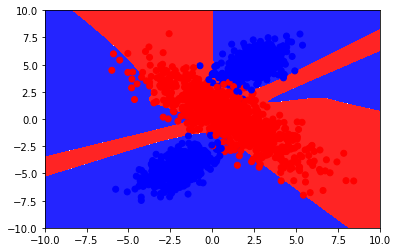

ACCURACY:  0.9625
CONFUSION MATRIX: 
 [[ 197.   13.]
 [   2.  188.]]
Cost 0.0 : 0.561966648794
Cost 1.0 : 0.513590909507
Cost 2.0 : 0.473769388304
Cost 3.0 : 0.439452278002
Cost 4.0 : 0.409385637824
Cost 5.0 : 0.382840412218
Cost 6.0 : 0.359299516994
Cost 7.0 : 0.338355594586
Cost 8.0 : 0.319667387984
Cost 9.0 : 0.302940309695


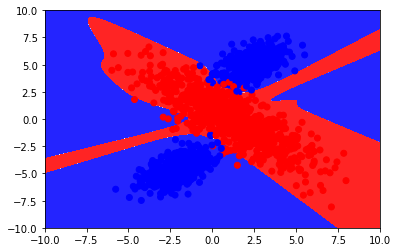

ACCURACY:  0.985
CONFUSION MATRIX: 
 [[ 186.    3.]
 [   3.  208.]]
Cost 0.0 : 0.277356812846
Cost 1.0 : 0.264137274912
Cost 2.0 : 0.252211610238
Cost 3.0 : 0.241390280084
Cost 4.0 : 0.231532335058
Cost 5.0 : 0.222522173403
Cost 6.0 : 0.214262372133
Cost 7.0 : 0.206669755659
Cost 8.0 : 0.199672742076
Cost 9.0 : 0.193209356844


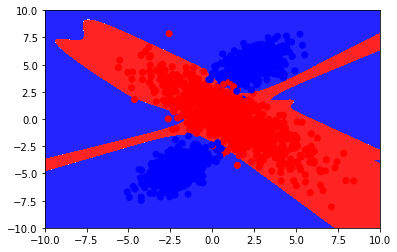

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[ 196.    5.]
 [   3.  196.]]
Cost 0.0 : 0.189219746157
Cost 1.0 : 0.183906503588
Cost 2.0 : 0.179102471919
Cost 3.0 : 0.174661336881
Cost 4.0 : 0.170527323908
Cost 5.0 : 0.166666817543
Cost 6.0 : 0.163053722307
Cost 7.0 : 0.159665818851
Cost 8.0 : 0.156483599244
Cost 9.0 : 0.153489736193


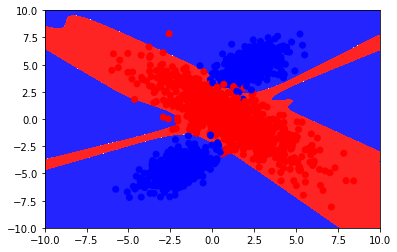

ACCURACY:  0.9875
CONFUSION MATRIX: 
 [[ 216.    4.]
 [   1.  179.]]
Cost 0.0 : 0.157155479726
Cost 1.0 : 0.153597436056
Cost 2.0 : 0.150570640025
Cost 3.0 : 0.147803670863
Cost 4.0 : 0.145227539562
Cost 5.0 : 0.142810600655
Cost 6.0 : 0.140533805497
Cost 7.0 : 0.138383530085
Cost 8.0 : 0.136348933123
Cost 9.0 : 0.134420844918


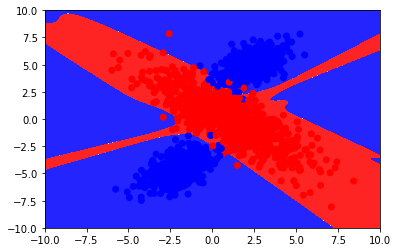

ACCURACY:  0.9875
CONFUSION MATRIX: 
 [[ 195.    4.]
 [   1.  200.]]


In [29]:
for j in range(0,5):
    logreg.fit(Xtrain[j],ytrain[j],1000,0.01)
#     print(logreg.compute_cost(Xtrain[j],ytrain[j]))
    plot_decision_boundary(logreg, Xtrain[j], ytrain[j])
    acc = 0
    y_pred = logreg.predict(Xtest[j])
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], ytest[j][i]] += 1
        if ytest[j][i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)

Cost 0.0 : 9.25309605723
Cost 1.0 : 5.24918065986
Cost 2.0 : 2.36891908298
Cost 3.0 : 0.947923308493
Cost 4.0 : 0.636132186036
Cost 5.0 : 0.538928392907
Cost 6.0 : 0.479432637837
Cost 7.0 : 0.434996927337
Cost 8.0 : 0.399848472008
Cost 9.0 : 0.371207608813
0.119613178742


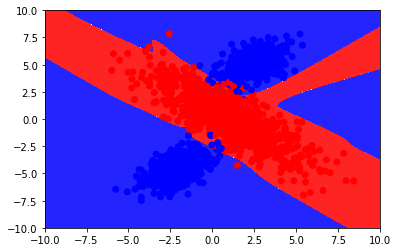

ACCURACY:  0.985
CONFUSION MATRIX: 
 [[ 197.    4.]
 [   2.  197.]]
Cost 0.0 : 0.351054000081
Cost 1.0 : 0.330708562785
Cost 2.0 : 0.313673855795
Cost 3.0 : 0.298900495587
Cost 4.0 : 0.285954381691
Cost 5.0 : 0.274514911386
Cost 6.0 : 0.264332921442
Cost 7.0 : 0.255211085848
Cost 8.0 : 0.246991130683
Cost 9.0 : 0.239544749886
0.118101077926


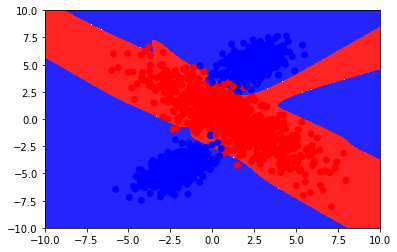

ACCURACY:  0.98
CONFUSION MATRIX: 
 [[ 185.    4.]
 [   4.  207.]]
Cost 0.0 : 0.231271249218
Cost 1.0 : 0.224416217905
Cost 2.0 : 0.218285274105
Cost 3.0 : 0.212693557502
Cost 4.0 : 0.207574938655
Cost 5.0 : 0.202873659474
Cost 6.0 : 0.198540251676
Cost 7.0 : 0.194531295894
Cost 8.0 : 0.190809218948
Cost 9.0 : 0.187341820159
0.11366797825


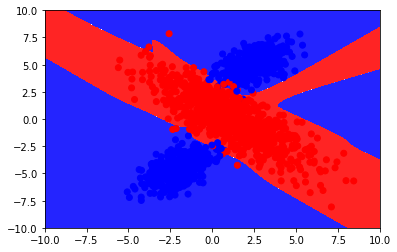

ACCURACY:  0.9875
CONFUSION MATRIX: 
 [[ 196.    2.]
 [   3.  199.]]
Cost 0.0 : 0.189354792504
Cost 1.0 : 0.186200154653
Cost 2.0 : 0.183403967069
Cost 3.0 : 0.18077386552
Cost 4.0 : 0.178290207884
Cost 5.0 : 0.175939859503
Cost 6.0 : 0.173711527351
Cost 7.0 : 0.171595253509
Cost 8.0 : 0.169582195907
Cost 9.0 : 0.167664464475
0.119184542226


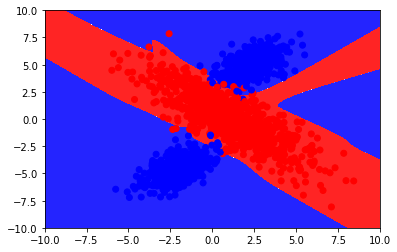

ACCURACY:  0.99
CONFUSION MATRIX: 
 [[ 215.    2.]
 [   2.  181.]]
Cost 0.0 : 0.168759184027
Cost 1.0 : 0.166638042917
Cost 2.0 : 0.16500638285
Cost 3.0 : 0.163484105308
Cost 4.0 : 0.162035032274
Cost 5.0 : 0.160647845048
Cost 6.0 : 0.159316527201
Cost 7.0 : 0.158036923278
Cost 8.0 : 0.156805710421
Cost 9.0 : 0.155620017365
0.121020631691


KeyboardInterrupt: 

In [19]:
for j in range(0,5):
    logreg.fitted(Xtrain[j],ytrain[j],1000,0.01,0.7)
    print(logreg.compute_cost(Xtrain[j],ytrain[j]))
    plot_decision_boundary(logreg, Xtrain[j], ytrain[j])
    acc = 0
    y_pred = logreg.predict(Xtest[j])
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], ytest[j][i]] += 1
        if ytest[j][i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    print ('ACCURACY: ', acc)
    print ('CONFUSION MATRIX: \n', con_mat)